📂 Processing image: ndvi_change_amazon.tif


C:\Users\sagni\AppData\Local\Temp\ipykernel_32256\4275848896.py:17: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\sagni\AppData\Local\Temp\ipykernel_32256\4275848896.py:18: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig("ndvi_heatmap.png")
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


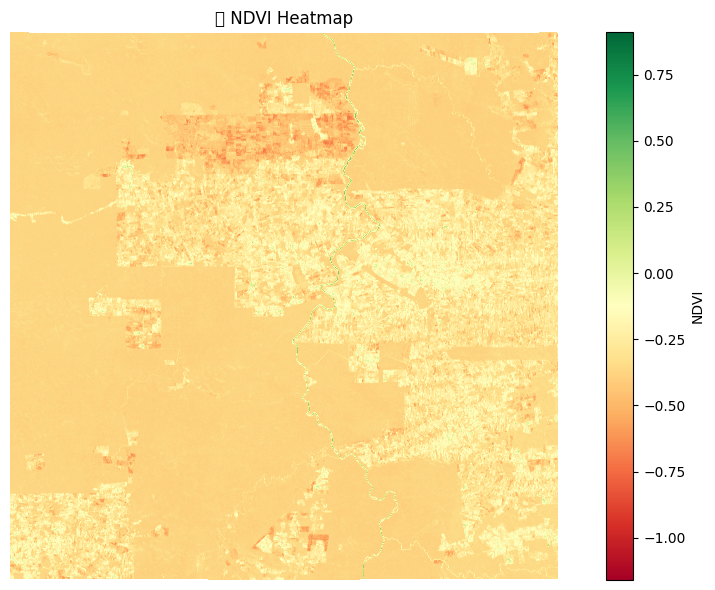

✅ Mean NDVI: -0.344
✅ Max NDVI: 0.910
✅ Min NDVI: -1.160
📊 Interpretation:
🔴 Sparse or stressed vegetation.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio

def compute_ndvi(image_path):
    with rasterio.open(image_path) as src:
        ndvi = src.read(1).astype(float)  # Only 1 band assumed as NDVI
    return ndvi

def plot_ndvi_heatmap(ndvi):
    plt.figure(figsize=(10, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI')
    plt.title('🌍 NDVI Heatmap')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("ndvi_heatmap.png")
    plt.show()

def extract_ndvi_stats(ndvi):
    masked_ndvi = ndvi[~np.isnan(ndvi)]
    mean_ndvi = np.mean(masked_ndvi)
    max_ndvi = np.max(masked_ndvi)
    min_ndvi = np.min(masked_ndvi)
    print(f"✅ Mean NDVI: {mean_ndvi:.3f}")
    print(f"✅ Max NDVI: {max_ndvi:.3f}")
    print(f"✅ Min NDVI: {min_ndvi:.3f}")
    return mean_ndvi, max_ndvi, min_ndvi

def explain_satellite_image(image_path):
    print(f"📂 Processing image: {os.path.basename(image_path)}")
    ndvi = compute_ndvi(image_path)
    plot_ndvi_heatmap(ndvi)
    stats = extract_ndvi_stats(ndvi)
    print("📊 Interpretation:")
    if stats[0] > 0.5:
        print("🟢 Healthy vegetation detected in most regions.")
    elif stats[0] > 0.2:
        print("🟡 Moderate vegetation health.")
    else:
        print("🔴 Sparse or stressed vegetation.")

# Run on your image
image_path = r"C:\Users\sagni\Downloads\Satellite Image Narrator\ndvi_change_amazon.tif"
explain_satellite_image(image_path)
